# **Lab Exercise 10: Time-Domain Analysis**

## Name: Vishwa R
## Reg. No: 21BAI1772

#Visualizing and Understanding Phonemes

###Waveform for the audio clip with the sentence 'She just had a cute baby!'

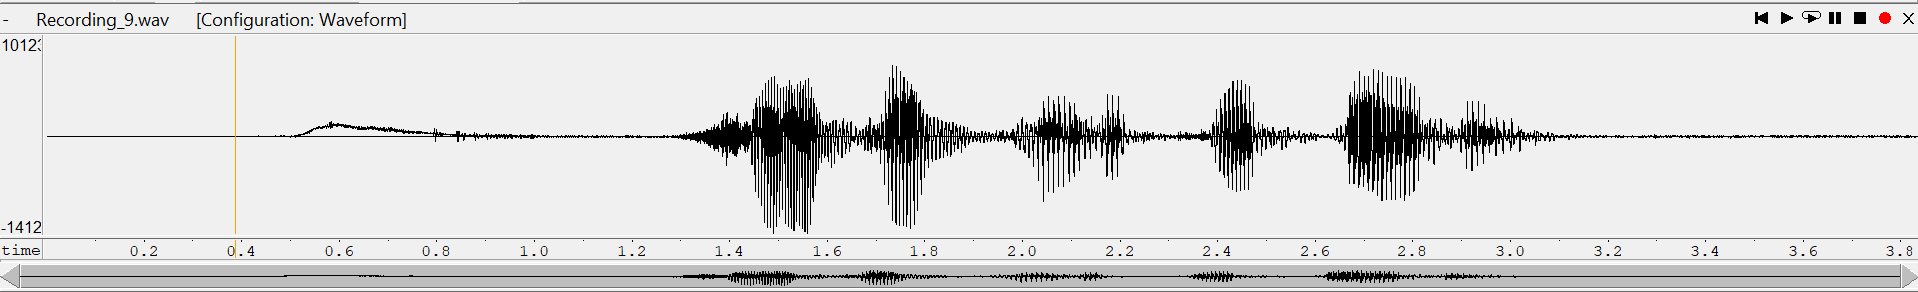

In [18]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load("/content/Recording_9.wav", sr=16000)  # Load at 16 kHz



Audio link: https://drive.google.com/file/d/1bbsNKj5wrse9wOU6S2VOPwzU384_HHEI/view?usp=sharing

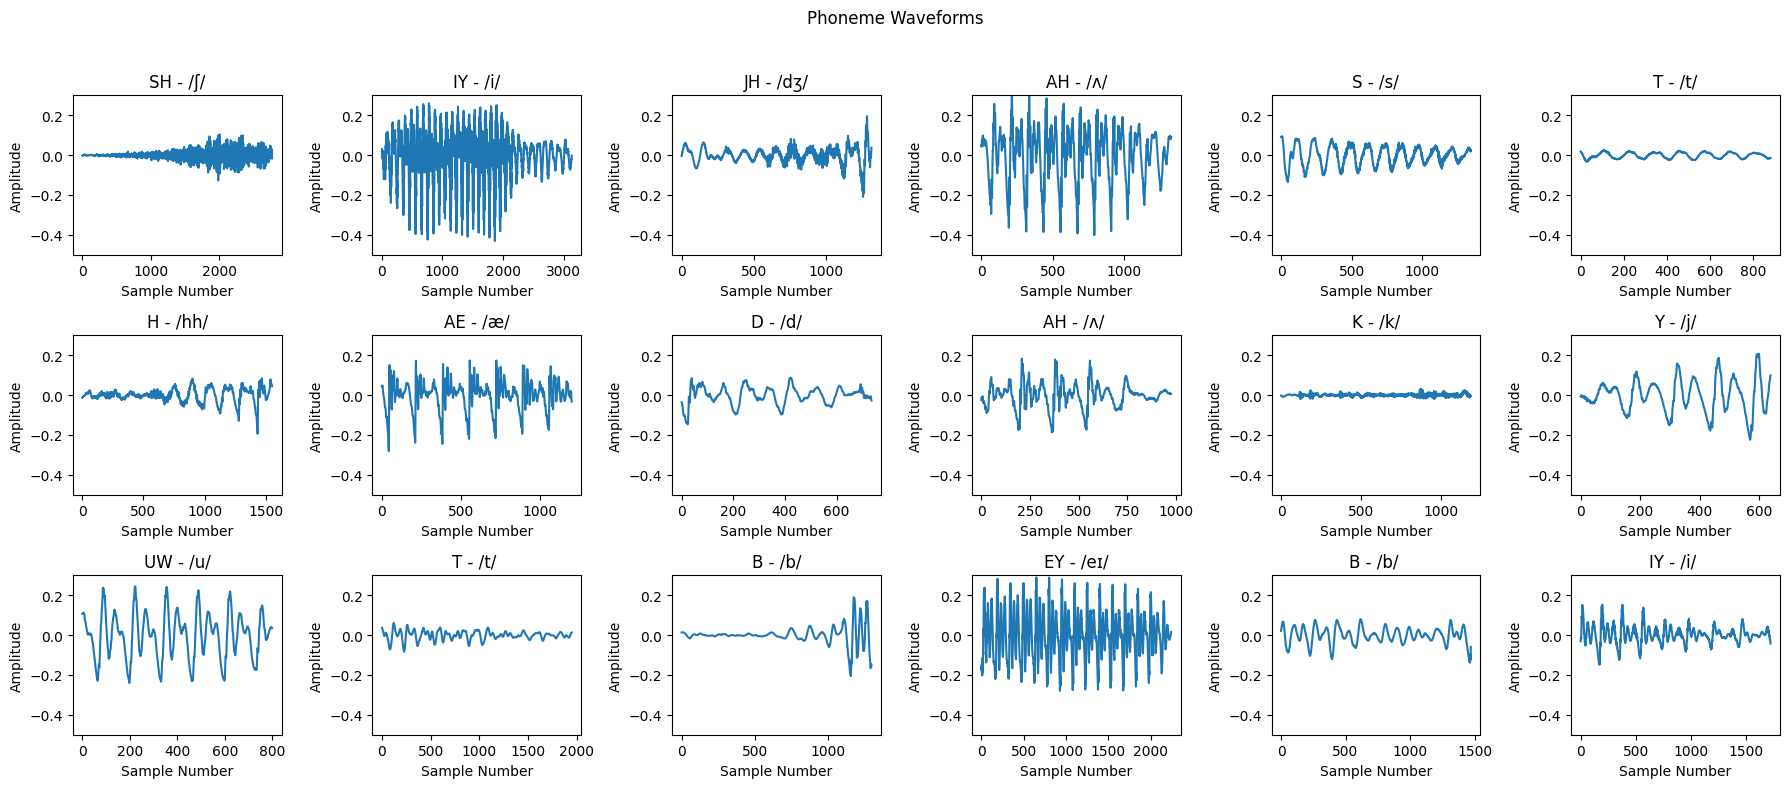

In [32]:
import matplotlib.pyplot as plt

# Sample dictionary with phonemes and start/end times
phonemes = {
    "SH - /ʃ/": (1.272, 1.445),
    "IY - /i/": (1.445, 1.641),
    "JH - /dʒ/": (1.641, 1.723),
    "AH - /ʌ/": (1.723, 1.806),
    "S - /s/": (1.806, 1.890),
    "T - /t/": (1.890, 1.945),
    "H - /hh/": (1.945, 2.042),
    "AE - /æ/": (2.042, 2.117),
    "D - /d/": (2.117, 2.163),
    "AH - /ʌ/ ": (2.163, 2.224),
    "K - /k/": (2.314, 2.388),
    "Y - /j/": (2.388, 2.428),
    "UW - /u/": (2.428, 2.478),
    "T - /t/ ": (2.478, 2.600),
    "B - /b/": (2.600, 2.681),
    "EY - /eɪ/": (2.681, 2.821),
    "B - /b/ ": (2.821, 2.913),
    "IY - /i/ ": (2.913, 3.021),
}

# Plot configuration
fig, axes = plt.subplots(3, 6, figsize=(18, 8))
fig.suptitle("Phoneme Waveforms")
axes = axes.flatten()

# Plot each phoneme
for i, (phoneme, (start_time, end_time)) in enumerate(phonemes.items()):
    start_sample = int(start_time * 16000)
    end_sample = int(end_time * 16000)
    axes[i].plot(y[start_sample:end_sample])
    axes[i].set_ylim(-0.5, 0.3) # Set y-axis range
    axes[i].set_title(phoneme)
    axes[i].set_xlabel("Sample Number")
    axes[i].set_ylabel("Amplitude")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#Finding Phonemes using G2P library

In [ ]:
pip install g2p_en

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.3 MB/s eta 0:00:00
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=a4c5316c019344ddf78f8bb581be78fa9698885508a6829c909138f0557e5f42
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
from g2p_en import G2p

text = "She just had a cute baby"
g2p = G2p()
out = g2p(text)
print(out)

['SH', 'IY1', ' ', 'JH', 'AH1', 'S', 'T', ' ', 'HH', 'AE1', 'D', ' ', 'AH0', ' ', 'K', 'Y', 'UW1', 'T', ' ', 'B', 'EY1', 'B', 'IY0']


#Differences between voiced and unvoiced waveforms
- Voiced sounds tend to have more of a periodic waveform meanwhile, Unvoiced sounds tend to have more of an aperiodic waveform. I think the periodicity is because of the vibrations of the vocal cords.
- The voiced sounds exhibit somewhat simple waveforms, where as the unvoiced sounds produce irregular and complex waveforms.

#Pitch Period Calculation for the Phoneme EY - /eɪ/

Average pitch period for 'EY - /eɪ/': 0.001234 seconds


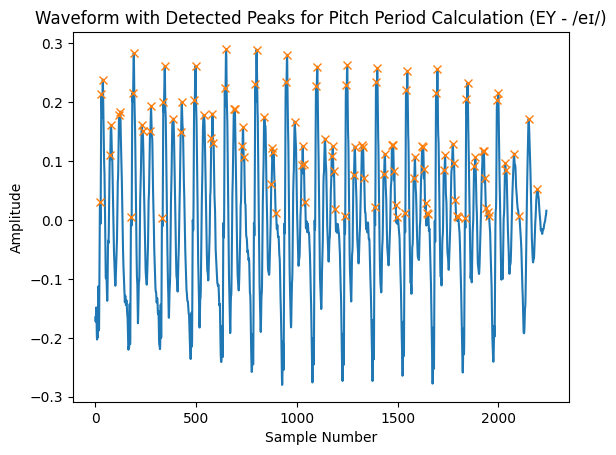

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import librosa


# Define start and end times in seconds for the segment "EY - /eɪ/"
start_time = 2.681
end_time = 2.821

# Convert time to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Extract the segment waveform
segment = y[start_sample:end_sample]

# Find peaks in the segment
peaks, _ = find_peaks(segment, height=0)  # Adjust `height` if necessary for peak detection

# Calculate intervals between consecutive peaks in samples
peak_intervals = np.diff(peaks)

# Convert intervals to time in seconds
pitch_periods = peak_intervals / sr

# Calculate the average pitch period
average_pitch_period = np.mean(pitch_periods)

print(f"Average pitch period for 'EY - /eɪ/': {average_pitch_period:.6f} seconds")

# Plot the segment waveform with peaks
plt.plot(segment)
plt.plot(peaks, segment[peaks], "x")  # Mark peaks
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Waveform with Detected Peaks for Pitch Period Calculation (EY - /eɪ/)")
plt.show()


##Average pitch period for 'EY - /eɪ/': 0.001234 seconds